In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import cv2

In [21]:
# Data for the DataFrame
data = {
    'Label Number': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Description': ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
}

# Creating the DataFrame
df = pd.DataFrame(data)

* We will train our model on fashion MNIST dataset on fashion items to be able to tell what item as input
- Below are the label descriptios

| Label Number | Description   |
|--------------|---------------|
| 0            | T-shirt/top   |
| 1            | Trouser       |
| 2            | Pullover      |
| 3            | Dress         |
| 4            | Coat          |
| 5            | Sandal        |
| 6            | Shirt         |
| 7            | Sneaker       |
| 8            | Bag           |
| 9            | Ankle boot    |


In [ ]:
# Load the fashion dataset and split it into different groups
fashion_set = tf.keras.datasets.fashion_mnist
(training_set, training_labels) , (test_set,test_labels) = fashion_set.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* Let us see select images with various representations:

LABEL:5
Image but as an array:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2 

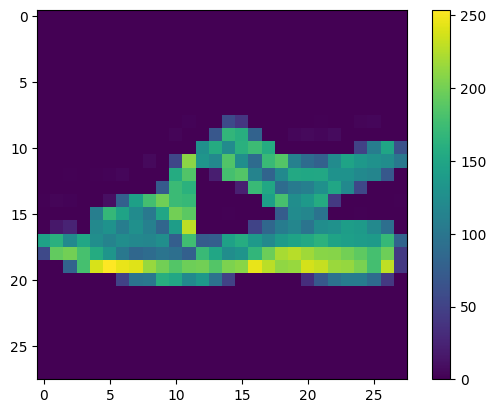

In [32]:
# Let us try any index
index=43

# Set the number of characters per row when printing
np.set_printoptions(linewidth=320)


# print the label and image respectively
print(f'LABEL:{training_labels[index]}')
print(f'Image but as an array:{training_set[index]}')

# Fetch item with Label Number as fetched above
description = df.loc[df['Label Number'] == training_labels[index], 'Description'].values[0]
# Print the result
print(f'The label represents a: {description}')


# View the image
plt.imshow(training_set[index])
plt.colorbar()
plt.show()

In [33]:
# Normalization step to make more numerically stable training
training_set = training_set/255.0
test_set = test_set/255.0

* Training Set: 60,000 images (which is 85.71% of the total dataset)
Test Set: 10,000 images (which is 14.29% of the total dataset)

* 1. Inner Layers:
ReLU (Rectified Linear Unit): ReLU is the most commonly used activation function in the hidden layers of deep neural networks. It is computationally efficient and helps to mitigate the vanishing gradient problem, allowing models to learn faster and perform better.
Variants of ReLU: Sometimes, variants like Leaky ReLU or Parametric ReLU are used to handle the issue of neurons getting "stuck" during training.
* 2. Output Layer:
Softmax: When dealing with a multi-class classification problem, like in Fashion MNIST where there are 10 different classes, the softmax activation function is preferred in the output layer. It converts the raw output logits into probabilities, with each class being assigned a probability value between 0 and 1 that sums up to 1.

In [35]:
# Defining the model
model = tf.keras.models.Sequential([

          tf.keras.Input(shape=(28,28)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation=tf.nn.relu),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)



])

In [37]:
# Start compiling and training the model
model.compile(optimizer= tf.optimizers.Adam(),
         loss = 'sparse_categorical_crossentropy'   ,
              metrics=['accuracy']
              )

model.fit(training_set,training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7824 - loss: 0.6298
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8594 - loss: 0.3919
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8757 - loss: 0.3418
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8861 - loss: 0.3105
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8900 - loss: 0.2944


* The final accuracy is 89%

In [38]:
# Evalute the model on unseen data
model.evaluate(test_set,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - loss: 0.3432


[0.34911295771598816, 0.8730000257492065]

* The accuracy on the test set did not differ so much : 87%

* Then Testing the model on a real image

In [41]:
# Load and preprocess the real image
def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')  # Convert image to grayscale
    img = img.resize((28, 28))               # Resize to 28x28 pixels
    img_array = np.array(img)                # Convert to numpy array
    img_array = img_array / 255.0            # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1) # Add channel dimension
    return img_array

In [68]:
# Example image path
img_path = 'hand.png'  # Replace with your image path

def process_fashion_image(image_path):
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert('L')

    # Resize the image to 28x28 pixels
    image = image.resize((28, 28))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Normalize the pixel values to the range [0, 1]
    image_array = image_array / 255.0

    # Ensure the array is in the shape expected by TensorFlow (batch size, height, width, channels)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension

    # Print the shape of the array to debug
    print("Shape of input array:", image_array.shape)

    # Print the normalized image array in grid format
    print("Normalized Image Array:")
    print(image_array.squeeze())  # Remove batch and channel dimensions for display

    # Display the image
    plt.imshow(image_array.squeeze(), cmap='gray')
    plt.title('Processed Fashion Image')
    plt.axis('off')
    plt.show()

    # Convert the NumPy array to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)

    return image_tensor






Shape of input array: (1, 28, 28, 1)
Normalized Image Array:
[[1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         0.96862745 1.         1.         1.         1.         0.96078431 1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.         1.         1.         0.86666667 0.69019608 0.4627451  0.23529412 0.45882353 0.71764706 0.69411765 0.43529412 0.22352941 0.45098039 0.75294118 0.96078431 1.         1.         1.         1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.         0.90588235 0.41960784 0.14117647 0.09019608 0.08627451 0.09019608 0.07058824 0.09411765 0.09019608 0.0745098  0.09019608 0.07843137 0.09411765 0.23529412 0.65098039 1.         1.         1.         1.         1.         1.         1.        ]
 [1.  

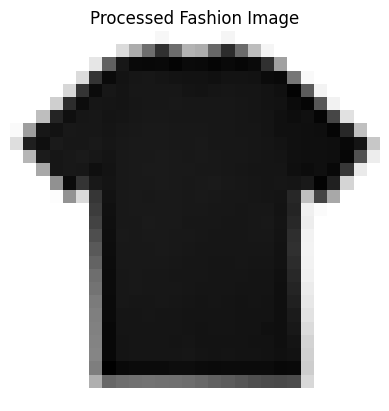

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted class is: T-shirt/top


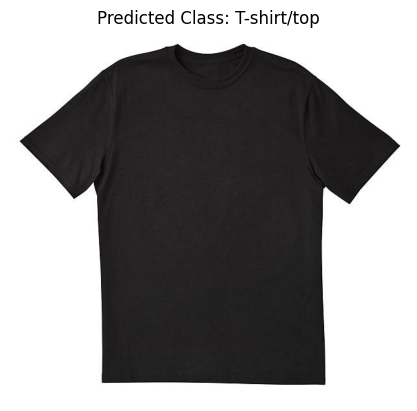

In [74]:


# Example usage
image_tensor = process_fashion_image('tsh.png')



def invert_image(image_array):
    """
    Inverts the normalized image array.

    Parameters:
    - image_array (np.ndarray): The normalized image array with values in the range [0, 1].

    Returns:
    - np.ndarray: The inverted image array.
    """
    # Ensure the image array is a NumPy array
    image_array = np.array(image_array)

    # Invert the image by subtracting from 1
    inverted_image = 1.0 - image_array

    return inverted_image

image_tensor = invert_image(image_tensor)
# Make prediction
predictions = model.predict(image_tensor)
predicted_class = np.argmax(predictions, axis=1)

# Class labels for Fashion MNIST
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the result
print(f'The predicted class is: {class_labels[predicted_class[0]]}')

# Display the image
img = Image.open('tsh.png')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()






Shape of input array: (1, 28, 28, 1)
Normalized Image Array:
[[1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         0.96470588 0.95294118 0.96078431 0.95294118 0.95686275 0.96862745 1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.        ]
 [1.  

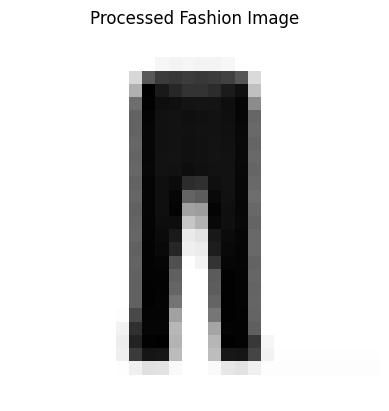

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The predicted class is: Trouser


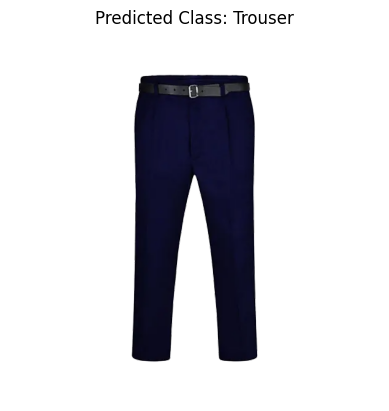

In [76]:


# Example usage
image_tensor = process_fashion_image('tro.png')



def invert_image(image_array):
    """
    Inverts the normalized image array.

    Parameters:
    - image_array (np.ndarray): The normalized image array with values in the range [0, 1].

    Returns:
    - np.ndarray: The inverted image array.
    """
    # Ensure the image array is a NumPy array
    image_array = np.array(image_array)

    # Invert the image by subtracting from 1
    inverted_image = 1.0 - image_array

    return inverted_image

image_tensor = invert_image(image_tensor)
# Make prediction
predictions = model.predict(image_tensor)
predicted_class = np.argmax(predictions, axis=1)

# Class labels for Fashion MNIST
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the result
print(f'The predicted class is: {class_labels[predicted_class[0]]}')

# Display the image
img = Image.open('tro.png')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {class_labels[predicted_class[0]]}')
plt.axis('off')
plt.show()




